<a href="https://colab.research.google.com/github/Sourav61/Goeduhub-Assignments/blob/main/Task_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Author: <a href = "https://github.com/Sourav61">Sourav Pahwa</a>
<br>ID: GO_STP_13420

<b>Task-8: Predicting a Startups Profit/Success Rate using Multiple Linear Regression in Python-Download Data Set <a href="https://drive.google.com/file/d/1swu61s27pXByZX5tSm4yMZ9ZMENUTASG/view">click here.</a><br /></b>

Here 50 startups dataset containing 5 columns  like <b>“R&D Spend”, “Administration”, “Marketing Spend”, “State”, “Profit”.</b>

In this dataset first 3 columns provides you spending on Research , Administration and Marketing respectively. State indicates startup based on that state. Profit indicates how much profits earned by a startup.

Clearly, we can understand that it is a multiple linear regression problem, as the independent variables are more than one.

<b>Prepare a prediction model for profit of 50_Startups data in Python</b>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
df.tail(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
40,28754.33,118546.05,172795.67,California,78239.91
41,27892.92,84710.77,164470.71,Florida,77798.83
42,23640.93,96189.63,148001.11,California,71498.49
43,15505.73,127382.30,35534.17,New York,69758.98
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.describe(include="all")

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,California,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [8]:
df.shape

(50, 5)

In [9]:
df.size

250

In [10]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [11]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

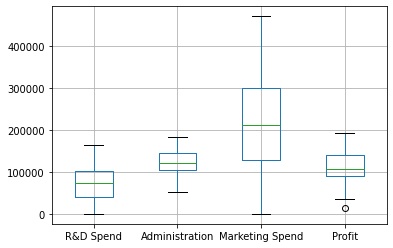

In [12]:
df.boxplot()

In [13]:
df.axes

[RangeIndex(start=0, stop=50, step=1),
 Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')]

In [14]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [15]:
df.kurt()

R&D Spend         -0.761465
Administration     0.225071
Marketing Spend   -0.671701
Profit            -0.063859
dtype: float64

In [16]:
df.skew()

R&D Spend          0.164002
Administration    -0.489025
Marketing Spend   -0.046472
Profit             0.023291
dtype: float64

In [17]:
df.keys()

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [18]:
df.isna().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [19]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

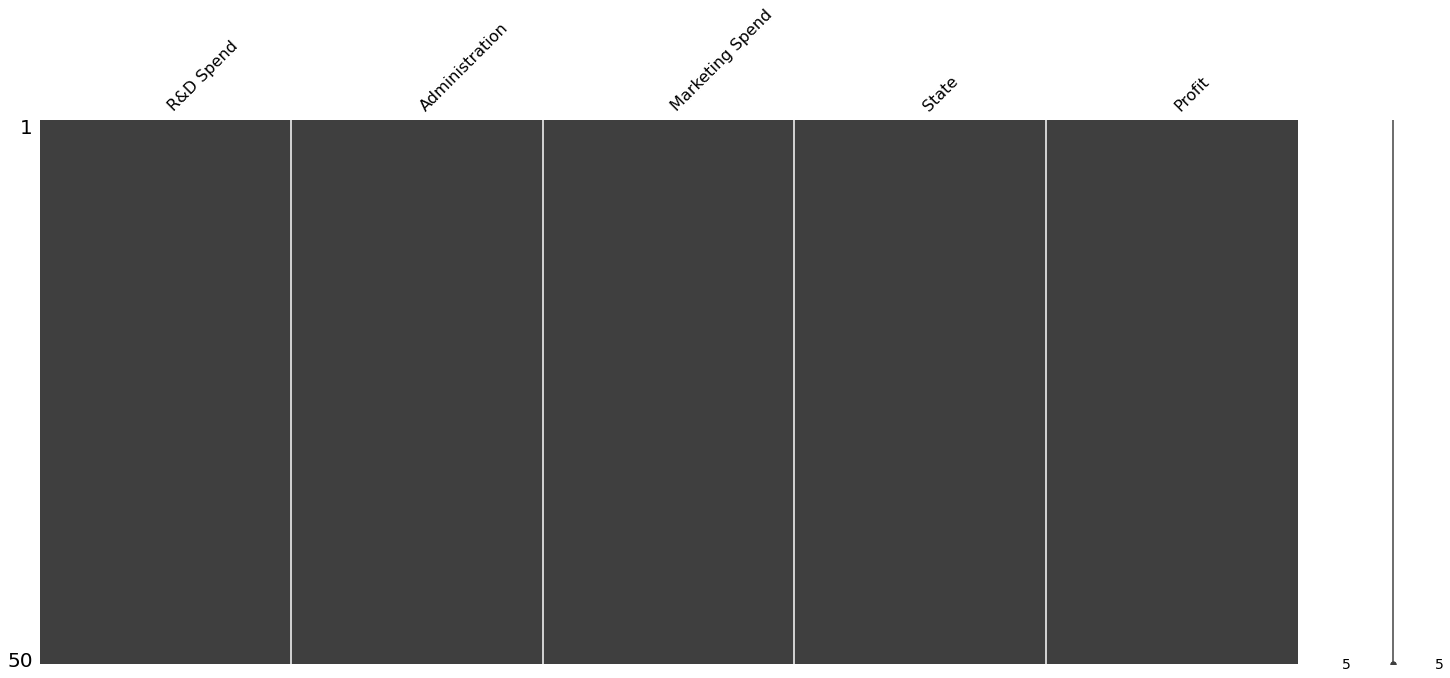

In [20]:
msno.matrix(df.sample(50))

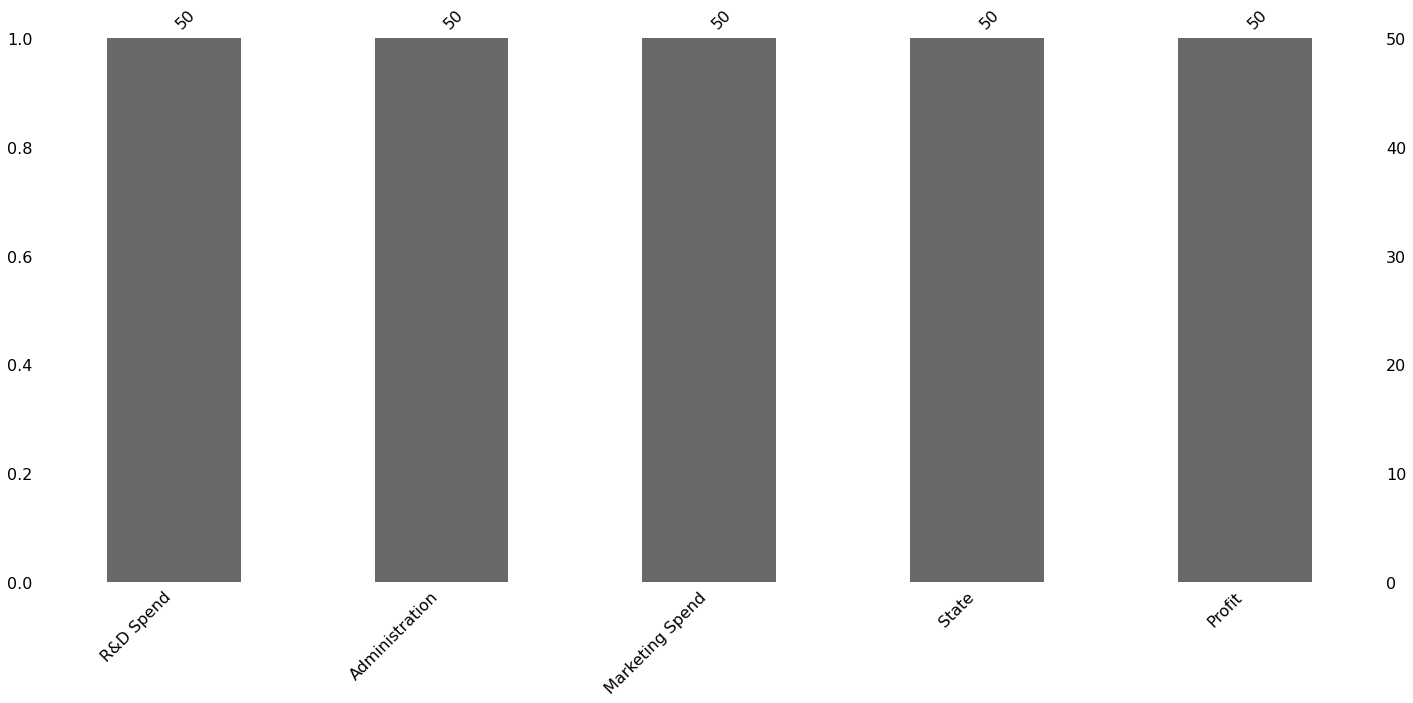

In [21]:
msno.bar(df.sample(50))

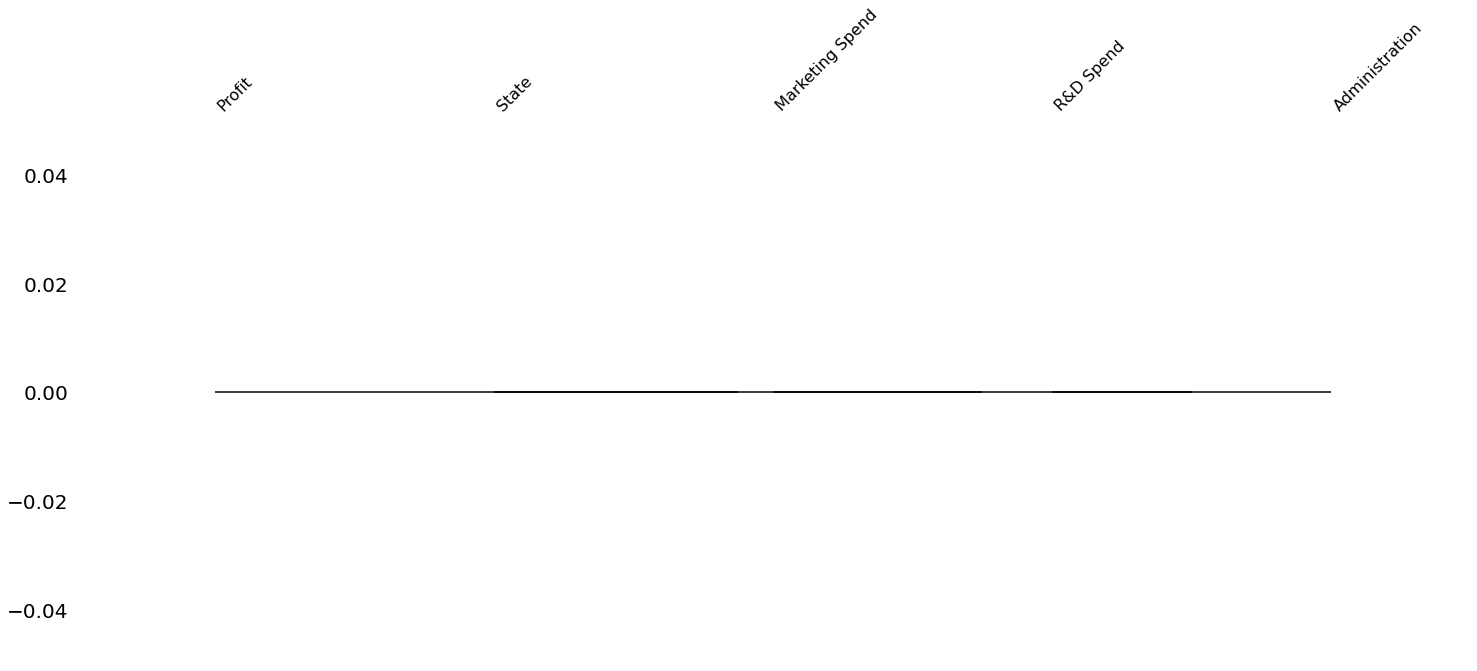

In [22]:
msno.dendrogram(df.sample(50))

In [23]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


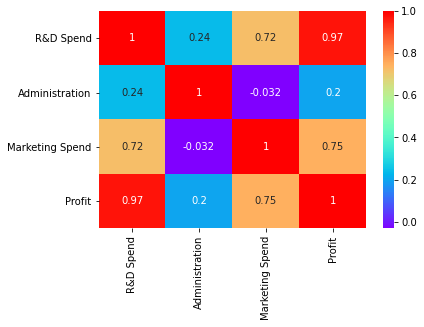

In [24]:
sns.heatmap(df.corr(), cmap='rainbow', annot = True) 

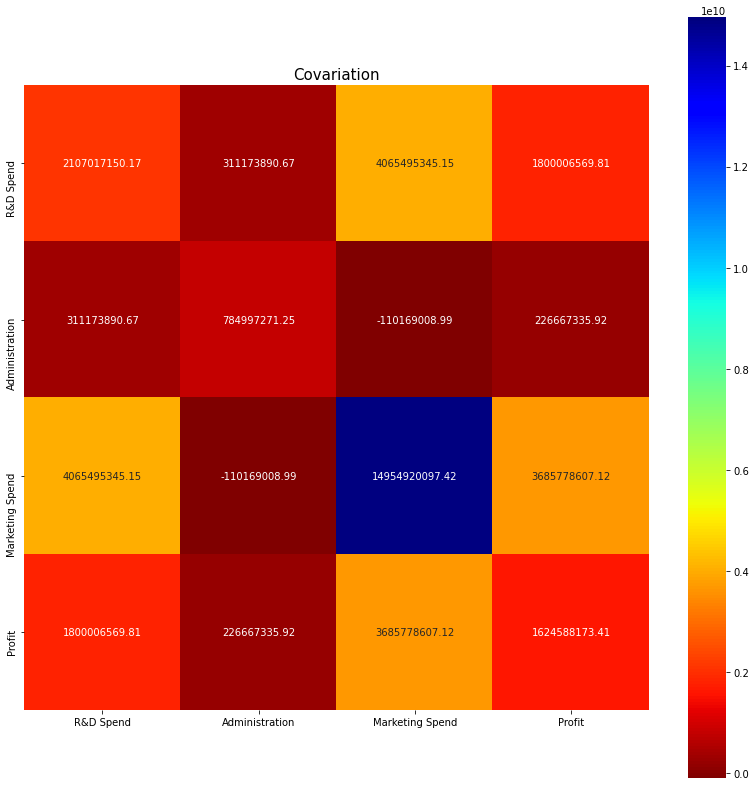

In [25]:
plt.figure(figsize=(14,14))
sns.heatmap(df.cov(), annot=True, fmt =".2f",square=True,cmap='jet_r')
plt.title("Covariation",fontsize = 15)
plt.show()

In [26]:
import random
import matplotlib.colors as mcolors
colors = random.choices(list(mcolors.CSS4_COLORS.values()))

In [27]:
mcolors.TABLEAU_COLORS
mcolors.BASE_COLORS
mcolors.CSS4_COLORS

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

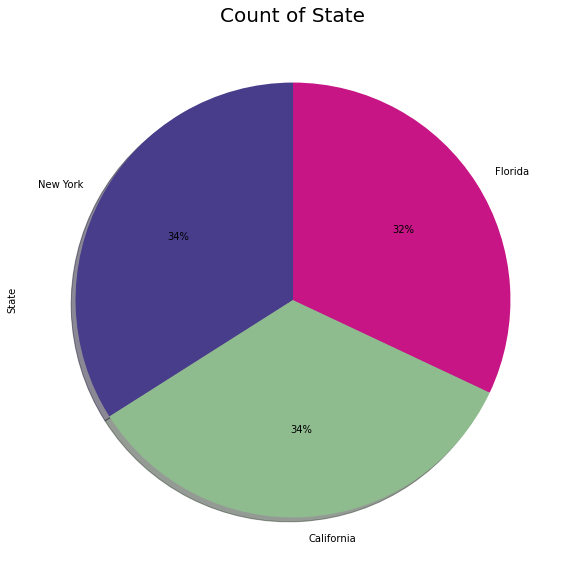

In [28]:
plt.figure(figsize=(10,10))
colors = ['#483D8B','#8FBC8F','#C71585']
df.State.value_counts().plot.pie(autopct='%.0f%%',labels=df.State.unique(),shadow = True,startangle = 90,colors=colors)
plt.title('Count of State',fontsize=20)
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x = df.drop(['Profit','State'], axis=1)
y = df['Profit']

In [31]:
x[:10]

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [32]:
y[:10]

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
5    156991.12
6    156122.51
7    155752.60
8    152211.77
9    149759.96
Name: Profit, dtype: float64

In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [34]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error,r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [35]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(normalize=True,n_jobs=-1)
lm.fit(xtrain , ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [36]:
lm.get_params(deep=True)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'normalize': True}

In [37]:
y_pred_train = lm.predict(xtrain)
y_pred_test = lm.predict(xtest)

In [38]:
df1 = pd.DataFrame(y_pred_test, ytest)
df1.head(10)

,0
Profit,
71498.49,70498.136171
101004.64,100725.145657
156122.51,154926.074663
122776.86,112726.455938
103282.38,101147.508905
125370.37,129963.034096
191050.39,180693.066757
69758.98,59561.780856
182901.99,172536.758281


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error ,r2_score
print("The Mean Squared Error is: ", end=" ")
mse = mean_squared_error(y_pred_test,ytest)
print(mse)
print("The Mean Absolute Error is: ", end=" ")
mae = mean_absolute_error(y_pred_test, ytest)
print(mae)

The Mean Squared Error is:  49179384.383639
The Mean Absolute Error is:  5680.177120816678


In [40]:
print('The R2 Score is: %0.2f ' % r2_score(ytest, y_pred_test))

The R2 Score is: 0.97 


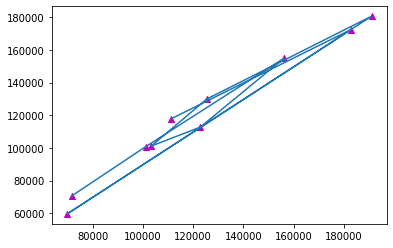

In [41]:
plt.scatter(ytest, y_pred_test,c='m', marker="^")
plt.plot(ytest, lm.predict(xtest))
plt.show()